<a href="https://colab.research.google.com/github/superpanditas/mobo/blob/main/MOBO_Data_Science_Case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0 - Getting Started

**Business Problem**: La empresa ha empezado a mostrar síntomas de estancamiento, incluso una leve contracción en ventas en 2023 con respecto a 2022


**Objective**: Entendimiento del desempeño de tiendas, ubicaciones y productos en diferentes niveles de detalle dando una caracterización a nuestras tiendas y productos, al final realizar un modelo para pronóstico de unidades vendidas para cada producto.


**Notebook Instructions**:



In [ ]:
# @title Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Task 1: Import the Dataset

El dataset_ventas.csv contiene registros de ventas realizados en diversas tiendas durante un periodo de 2 años (Entre 2022 y 2023).

El conjunto de datos contiene las siguientes columnas:

*   [ID Producto]: Identificador unico para cada producto
*   [ID Tienda]: Identificador unico para cada tienda
*   [Fecha de Venta]: Fecha en que se realiza venta
*   [Cantidad Vendida]: Unidades vendidas en la orden de compra
*   [Precio]: Precio por unidad
*   [Categoría de Producto]: Seis categorias [Deportes, Juguetes, Alimentos, Electrónica, Ropa, y Hogar]
*   [Ubicación de Tienda]: Cuatro ubicaciónes [Este, Norte, Sur, Oeste]
*   [Promoción o Descuento]: Un valor binario 1/0 indicando promoción
*   [Estacionalidad]: Un valor binario 1/0, indicando estacionalidad
*   [Método de Pago]: Efectivo/Crédito
*   [Nivel de Inventario]: Valor entero indicando inventario



In [ ]:
# @title Load dataset

# Step 1: Load CSV first in Google Colab
# Step 2: Copy file path, and load CSV using read_csv function from pandas
df_sales = pd.read_csv('/content/dataset_ventas-2.csv')

# Preview the DataFrame
df_sales.head()

,ID Producto,ID Tienda,Fecha de Venta,Cantidad Vendida,Precio Unitario,Categoría de Producto,Ubicación de Tienda,Promoción o Descuento,Estacionalidad,Método de Pago,Nivel de Inventario
0,Producto_43,Tienda_2,2023-02-13,81,498.48,Deportes,Zona Este,1,1,Efectivo,10
1,Producto_22,Tienda_1,2023-04-19,25,204.46,Juguetes,Zona Norte,0,1,Crédito,100
2,Producto_27,Tienda_6,2022-05-29,13,253.30,Alimentos,Zona Este,1,0,Crédito,100
3,Producto_6,Tienda_6,2022-08-15,67,134.23,Electrónica,Zona Norte,0,1,Efectivo,50
4,Producto_1,Tienda_5,2023-02-02,21,329.80,Alimentos,Zona Este,1,0,Efectivo,300


In [ ]:
''''
 Columns Names:
 ['ID Producto', 'ID Tienda', 'Fecha de Venta', 'Cantidad Vendida',
 'Precio Unitario', 'Categoría de Producto', 'Ubicación de Tienda',
 'Promoción o Descuento', 'Estacionalidad', 'Método de Pago',
 'Nivel de Inventario']
'''

df_sales = df_sales.rename(columns={
    'ID Producto':'ID Product',
    'ID Tienda': 'ID Store',
    'Fecha de Venta': 'Date',
    'Cantidad Vendida': 'Units Sold',
    'Precio Unitario': 'Price',
    'Categoría de Producto': 'Category',
    'Ubicación de Tienda': 'Location',
    'Promoción o Descuento': 'Promotion',
    'Estacionalidad': 'Seasonality',
    'Método de Pago': 'Payment Method',
    'Nivel de Inventario': 'Inventory'
})

# convert 'Fecha de Venta' column to date type
df_sales['Date'] = pd.to_datetime(df_sales['Date'],
                                            format = "%Y-%m-%d")

# convert 'Categoria de Producto', 'Ubicación de Tienda', and
# 'Método de Pago' columns to category datatype
df_sales['Category'] = df_sales['Category'].astype('category')
df_sales['Location'] = df_sales['Location'].astype('category')
df_sales['Payment Method'] = df_sales['Payment Method'].astype('category')

# add column of total sales
df_sales['Sales'] = df_sales['Price'] * df_sales['Units Sold']

# set 'Fecha de Venta' as index
# df_sales = df_sales.set_index('Date')

print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID Product      10000 non-null  object        
 1   ID Store        10000 non-null  object        
 2   Date            10000 non-null  datetime64[ns]
 3   Units Sold      10000 non-null  int64         
 4   Price           10000 non-null  float64       
 5   Category        10000 non-null  category      
 6   Location        10000 non-null  category      
 7   Promotion       10000 non-null  int64         
 8   Seasonality     10000 non-null  int64         
 9   Payment Method  10000 non-null  category      
 10  Inventory       10000 non-null  int64         
 11  Sales           10000 non-null  float64       
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 733.1+ KB
None


### Task 2: Understanding the dataset

- El dataset contiene 10 tiendas con 4 ubicaciónes cada una.
- El share de transacciones por metodo de pago y categoria es muy similar
- Contamos con 50 productos distintos, y tambien importante que cada producto no es exclusivo de una categoria (Incluso un producto puede pertenecer a las 6 categorias)
- Las distribucion de unidades vendidas se mantiene en un rango de 1 a 100, y precio de 5 a 500 por unidad.

In [ ]:
# Understanding distribution for each numeric variable
df_sales.describe().round(2)

,Date,Units Sold,Price,Promotion,Seasonality,Inventory,Sales
count,10000,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00
mean,2022-12-29 20:17:05.280000256,50.78,252.43,0.5,0.5,134.08,12786.76
min,2022-01-01 00:00:00,1.00,5.10,0.0,0.0,5.00,6.82
25%,2022-06-29 00:00:00,26.00,128.38,0.0,0.0,20.00,3636.38
50%,2022-12-29 00:00:00,51.00,252.47,1.0,1.0,50.00,9670.22
75%,2023-07-01 00:00:00,76.00,377.96,1.0,1.0,200.00,19463.51
max,2023-12-30 00:00:00,100.00,499.98,1.0,1.0,500.00,49923.00
std,NaN,28.96,143.90,0.5,0.5,158.70,11055.62


In [ ]:
df_sales[['Location', 'Category', 'Payment Method']].describe()

,Location,Category,Payment Method
count,10000,10000,10000
unique,4,6,3
top,Zona Sur,Alimentos,Tarjeta
freq,2596,1683,3341


In [ ]:
df_sales.groupby(['ID Store']).agg({
    'Location':['nunique'],
    'ID Product':['nunique']
})

,Location,ID Product
,nunique,nunique
ID Store,,
Tienda_1,4,50
Tienda_10,4,50
Tienda_2,4,50
Tienda_3,4,50
Tienda_4,4,50
Tienda_5,4,50
Tienda_6,4,50
Tienda_7,4,50


In [ ]:
df_sales['Promotion'].value_counts(normalize=True)

,proportion
Promotion,
1,0.5016
0,0.4984


In [ ]:
df_sales['Seasonality'].value_counts(normalize=True)

,proportion
Seasonality,
1,0.5021
0,0.4979


Task3: Benchmarck: Comparativa de performance entre tiendas según su primer mes de ventas

El objetivo es comparar el performance de unidades vendidas entre tiendas, pero para tener una comparacion mas equilibrada/justa debemos normarlizar nuestra data.

Al dividir unidades vendidas por mes de cada tienda con su primer mes de venta y multiplicando por 100, obtenemos un porcentual de crecimiento respecto a su punto de partida, es decir desde que inicio operaciones esa tienda, con ello conseguimos una comparacion mas justa y logramos determinar que tiendas han tenido un mejor performance versus otras a lo largo de el tiempo.

Finalmente calculamos el promedio de estos crecimiento, proporcionando nos una visión general sobre la evolución de las ventas en todas las tiendas en comparación con su primer mes de ventas.

Observaciones:
- Las tiendas 1 & 8 destacan por un crecimiento promedio superior al 20% respecto a su primer mes, posicionándose en el top.
- La tienda 10, a pesar del inusual pico de ventas en enero de 2023 que superó ampliamente al resto, se posiciona como la de peor desempeño, con un promedio de crecimiento inferior al 20%.
- Algunas tiendas, como la 6 y la 4, se encuentran en una situación de estancamiento, mostrando ventas consistentes mes a mes sin un crecimiento o decrecimiento significativo respecto a su inicio.
- La tienda 5, aunque cercana al bottom, se mantiene con un desempeño moderado, resgistrando un promedio de un 12% menos de ventas en comparación con su primer mes, manteniendo una distancia considerable respecto a la tienda 10.
- Por último tiendas 9, 7 & 3 con un crecimiento entre 7% - 10%, ubicandose con un buen performance, igual aún lejos de las tiendas 1 & 8.  


In [ ]:
df_sales_copy = df_sales.copy()
col_names = ['Date','ID Store','ID Product','Units Sold','Price','Promotion','Seasonality']
df_sales_copy = df_sales_copy[col_names]
df_sales_copy.set_index('Date', inplace=True)

monthly_sales = (
    df_sales_copy.groupby('ID Store')
    .resample('ME')
    .agg({
        'Units Sold':'sum',
        'Promotion':'sum',
        'Seasonality':'sum',
        'ID Product':'count'
    })
    .reset_index()
)

# normalizamos unidades con respecto su primer mes de venta para cada tienda
monthly_sales_pivoted = monthly_sales.pivot(index='Date', columns='ID Store', values='Units Sold')
normalized = monthly_sales_pivoted.div(monthly_sales_pivoted.iloc[0]).mul(100)
average_growth = normalized.mean()
average_growth.name = 'average_growth'
print('Crecimiento promedio respecto al primer mes de ventas')
average_growth.sort_values(ascending=False)

Crecimiento promedio respecto al primer mes de ventas


,average_growth
ID Store,
Tienda_8,128.150286
Tienda_1,120.302943
Tienda_3,113.119603
Tienda_7,108.834586
Tienda_9,106.523870
Tienda_6,99.194915
Tienda_4,97.712634
Tienda_5,87.928045
Tienda_2,76.903236


Task 4: Impacto/Sensibilidad de la diferentes ubicaciónes para cada tienda con respecto a promociónes y estacionalidad

In [ ]:
df_matrix = df_sales.copy()
df_matrix = df_matrix[col_names + ['Location']]

df_matrix['Unidades con promo'] = df_matrix['Units Sold'] * df_matrix['Promotion']
df_matrix['Unidades sin promo'] = df_matrix['Units Sold'] * (1 - df_matrix['Promotion'])

df_matrix['Unidades con season'] = df_matrix['Units Sold'] * df_matrix['Seasonality']
df_matrix['Unidades sin season'] = df_matrix['Units Sold'] * (1 - df_matrix['Seasonality'])

df_promo = df_matrix.groupby(['ID Store', 'Location']).agg({
    'Unidades con promo':'sum',
    'Unidades sin promo':'sum'
}).reset_index()

df_season = df_matrix.groupby(['ID Store', 'Location']).agg({
    'Unidades con season':'sum',
    'Unidades sin season':'sum'
}).reset_index()

df_promo['ratio promo/sin promo'] = df_promo['Unidades con promo'] / df_promo['Unidades sin promo']
df_season['ratio season/sin season'] = df_season['Unidades con season'] / df_season['Unidades sin season']

df_promo_pivoted = df_promo.pivot(index='ID Store', columns='Location', values='ratio promo/sin promo').reset_index()
df_season_pivoted = df_season.pivot(index='ID Store', columns='Location', values='ratio season/sin season').reset_index()


ratio_matrix = pd.merge(df_promo_pivoted, df_season_pivoted, on='ID Store', how='inner')
ratio_matrix.head()

<ipython-input-23-71932c7e1ac2>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_promo = df_matrix.groupby(['ID Store', 'Location']).agg({
<ipython-input-23-71932c7e1ac2>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_season = df_matrix.groupby(['ID Store', 'Location']).agg({


Location,ID Store,Zona Este_x,Zona Norte_x,Zona Oeste_x,Zona Sur_x,Zona Este_y,Zona Norte_y,Zona Oeste_y,Zona Sur_y
0,Tienda_1,0.771545,1.215456,0.888581,1.187604,0.860062,1.127105,0.923123,0.972799
1,Tienda_10,0.911782,0.989851,0.920284,0.948012,1.205708,1.254402,1.271274,0.955882
2,Tienda_2,0.956974,1.025676,1.093556,0.761309,1.025135,0.902951,1.180282,1.134684
3,Tienda_3,1.221311,1.205841,1.161279,1.461375,0.763714,0.805350,1.294214,0.813187
4,Tienda_4,0.947016,0.953652,1.202039,0.834492,1.066247,0.966633,0.932797,0.889950


Task 5: Caracterizacion de nuestras tiendas

A partir de medir el crecimiento + efectividad de promociónes y estacionalidades es como buscaremos segmentar nuestras tiendas y conseguir una caracterización

Las metricas a usar son:
- Ratio Promo = Unidades Vendidas con Promo / Sin Promo (para cada ubicación)
- Ratio Estacionalidad = Unidades Vendidas con Estacionalidad / Sin Estacionalidad (para cada ubicación)
- Promedio de Unidades Vendidas Mensuales / Unidades Vendidas Primer Mes

In [ ]:
start_date = df_sales['Date'].min()
end_date = df_sales['Date'].max()
dates = pd.date_range(start=start_date, end=end_date, freq='D')
stores = df_sales['ID Store'].unique()

all_dates = pd.MultiIndex.from_product([stores, dates], names=['ID Store', 'Date'])
df_completed = pd.DataFrame(index=all_dates).reset_index()

df_sales_all = pd.merge(df_completed, df_sales, on=['ID Store', 'Date'], how='left')

df_sales_all['Promotion'] = df_sales_all['Promotion'].fillna(0)
df_sales_all['Units Sold'] = df_sales_all['Units Sold'].fillna(0)
df_sales_all['Seasonality'] = df_sales_all['Seasonality'].fillna(0)

df_sales_temp = df_sales_all[['ID Store', 'Date', 'Units Sold', 'Promotion', 'Seasonality']]
df_sales_daily = df_sales_temp.groupby(['ID Store', 'Date']).agg({
    'Units Sold':'sum',
    'Promotion':'sum',
    'Seasonality':'sum'
}).reset_index()

df_sales_daily['with_sales'] = np.where(df_sales_daily['Units Sold'] > 0, 1, 0)
df_sales_daily['with_promotion'] = np.where(df_sales_daily['Promotion'] > 0, 1, 0)
df_sales_daily['with_seasonality'] = np.where(df_sales_daily['Seasonality'] > 0, 1, 0)

df_sales_input = df_sales_daily.groupby(['ID Store']).agg({
    'Date':'nunique',
    'with_promotion':'sum',
    'with_seasonality':'sum',
    'with_sales':'sum'
}).reset_index()

df_sales_input['pct_days_with_sales'] = df_sales_input['with_sales'] / df_sales_input['Date']
df_sales_input['pct_days_with_promotion'] = df_sales_input['with_promotion'] / df_sales_input['with_sales']
df_sales_input['pct_days_with_seasonality'] = df_sales_input['with_seasonality'] / df_sales_input['with_sales']

growth = average_growth.reset_index()
df_sales_input = pd.merge(df_sales_input, growth, on=['ID Store'], how='inner')
input = pd.merge(df_sales_input, ratio_matrix, on=['ID Store'], how='inner')

input.head()


,ID Store,Date,with_promotion,with_seasonality,with_sales,pct_days_with_sales,pct_days_with_promotion,pct_days_with_seasonality,average_growth,Zona Este_x,Zona Norte_x,Zona Oeste_x,Zona Sur_x,Zona Este_y,Zona Norte_y,Zona Oeste_y,Zona Sur_y
0,Tienda_1,729,355,357,548,0.751715,0.647810,0.651460,120.302943,0.771545,1.215456,0.888581,1.187604,0.860062,1.127105,0.923123,0.972799
1,Tienda_10,729,351,376,540,0.740741,0.650000,0.696296,73.922414,0.911782,0.989851,0.920284,0.948012,1.205708,1.254402,1.271274,0.955882
2,Tienda_2,729,368,375,563,0.772291,0.653641,0.666075,76.903236,0.956974,1.025676,1.093556,0.761309,1.025135,0.902951,1.180282,1.134684
3,Tienda_3,729,385,351,537,0.736626,0.716946,0.653631,113.119603,1.221311,1.205841,1.161279,1.461375,0.763714,0.805350,1.294214,0.813187
4,Tienda_4,729,374,375,553,0.758573,0.676311,0.678119,97.712634,0.947016,0.953652,1.202039,0.834492,1.066247,0.966633,0.932797,0.889950


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['pct_days_with_sales', 'pct_days_with_promotion', 'pct_days_with_seasonality',
            'average_growth', 'Zona Este_x', 'Zona Norte_x', 'Zona Oeste_x', 'Zona Sur_x',
            'Zona Este_y', 'Zona Norte_y', 'Zona Oeste_y', 'Zona Sur_y']

X = input[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
# print(np.cumsum(pca.explained_variance_ratio_))
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca['ID Store'] = input['ID Store']

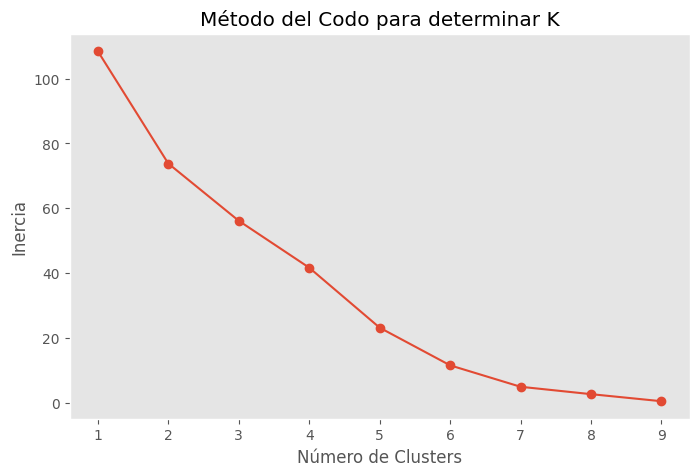

In [ ]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para determinar K")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.grid()
plt.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(X_pca)
input['cluster'] = df_pca['cluster']

input.head(10)

,ID Store,Date,with_promotion,with_seasonality,with_sales,pct_days_with_sales,pct_days_with_promotion,pct_days_with_seasonality,average_growth,Zona Este_x,Zona Norte_x,Zona Oeste_x,Zona Sur_x,Zona Este_y,Zona Norte_y,Zona Oeste_y,Zona Sur_y,cluster
0,Tienda_1,729,355,357,548,0.751715,0.647810,0.651460,120.302943,0.771545,1.215456,0.888581,1.187604,0.860062,1.127105,0.923123,0.972799,2
1,Tienda_10,729,351,376,540,0.740741,0.650000,0.696296,73.922414,0.911782,0.989851,0.920284,0.948012,1.205708,1.254402,1.271274,0.955882,4
2,Tienda_2,729,368,375,563,0.772291,0.653641,0.666075,76.903236,0.956974,1.025676,1.093556,0.761309,1.025135,0.902951,1.180282,1.134684,1
3,Tienda_3,729,385,351,537,0.736626,0.716946,0.653631,113.119603,1.221311,1.205841,1.161279,1.461375,0.763714,0.805350,1.294214,0.813187,0
4,Tienda_4,729,374,375,553,0.758573,0.676311,0.678119,97.712634,0.947016,0.953652,1.202039,0.834492,1.066247,0.966633,0.932797,0.889950,1
5,Tienda_5,729,377,361,554,0.759945,0.680505,0.651625,87.928045,1.248967,0.906054,1.112490,1.211407,1.183467,0.829445,1.033272,1.090395,3
6,Tienda_6,729,352,366,547,0.750343,0.643510,0.669104,99.194915,0.885387,0.970052,1.049837,0.907288,0.968799,1.178934,1.112000,1.025048,1
7,Tienda_7,729,360,362,538,0.737997,0.669145,0.672862,108.834586,0.941418,0.960137,1.121017,0.795020,0.971640,1.111182,1.019690,1.033428,1
8,Tienda_8,729,370,355,549,0.753086,0.673953,0.646630,128.150286,0.953406,1.027006,1.176587,0.943021,0.975250,1.007995,0.950380,1.086395,1
9,Tienda_9,729,338,362,545,0.747599,0.620183,0.664220,106.523870,0.920278,0.870059,1.032180,0.770239,0.987600,0.975996,1.031826,0.890509,1


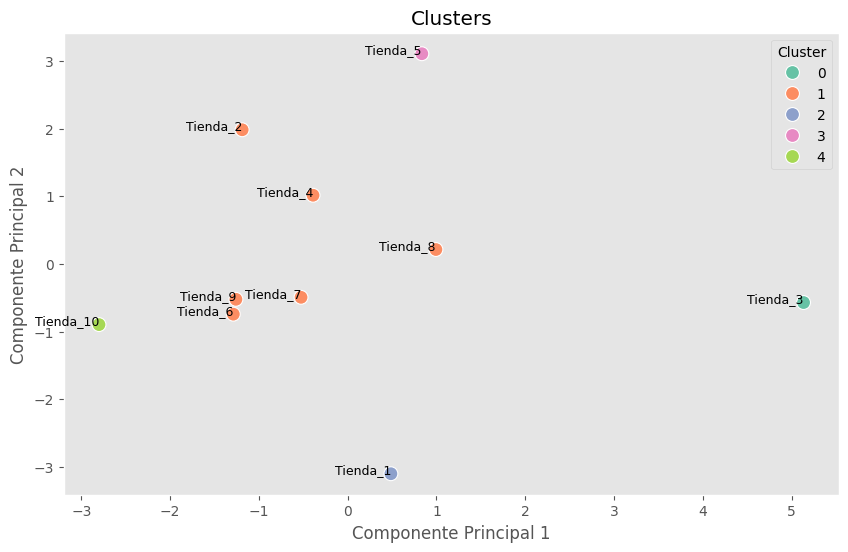

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PC1", y="PC2", hue="cluster", data=df_pca, palette="Set2", s=100
)
for i in range(df_pca.shape[0]):
    plt.text(
        df_pca["PC1"][i],
        df_pca["PC2"][i],
        df_pca["ID Store"][i],
        fontsize=9,
        ha="right"
    )
plt.title("Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [ ]:
cluster_summary = input.groupby('cluster')[features].median()
cluster_summary.head(6)
cluster_summary.to_csv('cluster_summary.csv')

Brainstorming

-

In [ ]:
df_products = df_sales.copy()
features_prod = ['ID Product', 'ID Store', 'Date', 'Units Sold',
                 'Promotion', 'Seasonality', 'Sales']
df_products = df_products[features_prod]


df_products = df_products.sort_values(['ID Product', 'Date'], ascending=[True, True])
df_products['diff_days'] = df_products.groupby('ID Product')['Date'].diff().dt.days
df_products['diff_days'] = df_products['diff_days'].fillna(0)

df_products['Unidades con promo'] = df_products['Units Sold'] * df_products['Promotion']
df_products['Unidades sin promo'] = df_products['Units Sold'] * (1-df_products['Promotion'])

df_products['Unidades con season'] = df_products['Units Sold'] * df_products['Seasonality']
df_products['Unidades sin season'] = df_products['Units Sold'] * (1-df_products['Seasonality'])

df_prod_agg = df_products.groupby(['ID Product']).agg({
    'Unidades con promo':'sum',
    'Unidades sin promo':'sum',
    'Unidades con season':'sum',
    'Unidades sin season':'sum',
    'Units Sold':'sum',
    'Sales':'sum',
    'diff_days':'mean'
}).reset_index()

df_prod_agg['ratio promo'] = df_prod_agg['Unidades con promo'] / df_prod_agg['Unidades sin promo']
df_prod_agg['ratio season'] = df_prod_agg['Unidades con season'] / df_prod_agg['Unidades sin season']

# df_prod_agg.head()

In [ ]:
features_model = ['ratio promo', 'ratio season', 'Units Sold', 'Sales', 'diff_days']

X_prod = df_prod_agg[features_model]
scaler_prod = StandardScaler()
X_prod_scaled = scaler_prod.fit_transform(X_prod)

pca_prod = PCA(n_components=3)
X_prod_pca = pca_prod.fit_transform(X_prod_scaled)
# print(np.cumsum(pca_prod.explained_variance_ratio_))
df_prod_pca = pd.DataFrame(X_prod_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_prod_pca['ID Product'] = df_prod_agg['ID Product']

# df_prod_pca.head()

,PCA1,PCA2,PCA3,ID Product
0,-0.763638,0.411995,-0.301816,Producto_1
1,1.012087,0.881334,1.205291,Producto_10
2,-0.072674,0.930581,-0.251488,Producto_11
3,-0.864434,1.220575,0.972772,Producto_12
4,1.310390,-1.848842,0.394096,Producto_13


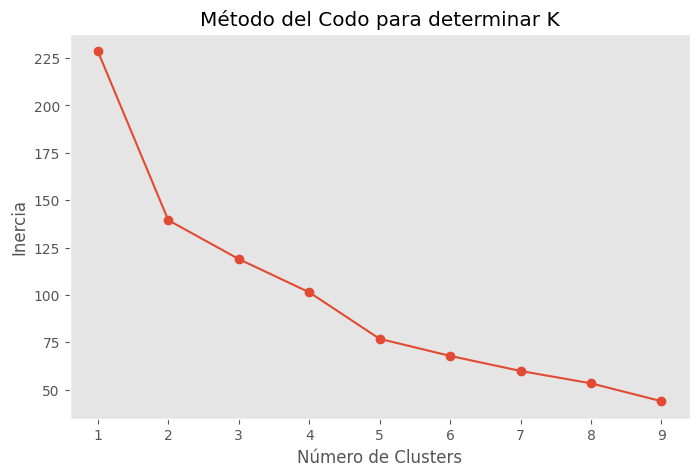

In [ ]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prod_pca)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para determinar K")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.grid()
plt.show()

In [ ]:
k_prod = 5
kmeans = KMeans(n_clusters=k_prod, random_state=42)
df_prod_pca['cluster'] = kmeans.fit_predict(X_prod_pca)
df_prod_agg['cluster'] = df_prod_pca['cluster']

df_prod_agg.describe()

,Unidades con promo,Unidades sin promo,Unidades con season,Unidades sin season,Units Sold,Sales,diff_days,ratio promo,ratio season,cluster
count,50.000000,50.000000,50.000000,50.000000,50.00000,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,5080.360000,5075.860000,5105.600000,5050.620000,10156.22000,2.557351e+06,3.627294,1.009810,1.024685,2.020000
std,539.190579,460.562257,526.391102,541.147454,675.68986,2.183967e+05,0.234740,0.147666,0.166410,1.237014
min,3818.000000,3910.000000,3638.000000,3968.000000,8578.00000,2.117887e+06,3.167401,0.756925,0.689799,0.000000
25%,4823.500000,4761.750000,4754.500000,4589.750000,9803.75000,2.385641e+06,3.450319,0.895034,0.871042,1.000000
50%,5032.000000,5049.000000,5099.500000,5059.000000,10148.50000,2.555622e+06,3.621558,0.979237,1.057037,2.000000
75%,5486.500000,5389.750000,5421.750000,5532.000000,10562.00000,2.714932e+06,3.759067,1.130455,1.127453,3.000000
max,6358.000000,6570.000000,6097.000000,6031.000000,11543.00000,3.085553e+06,4.385542,1.285978,1.465322,4.000000


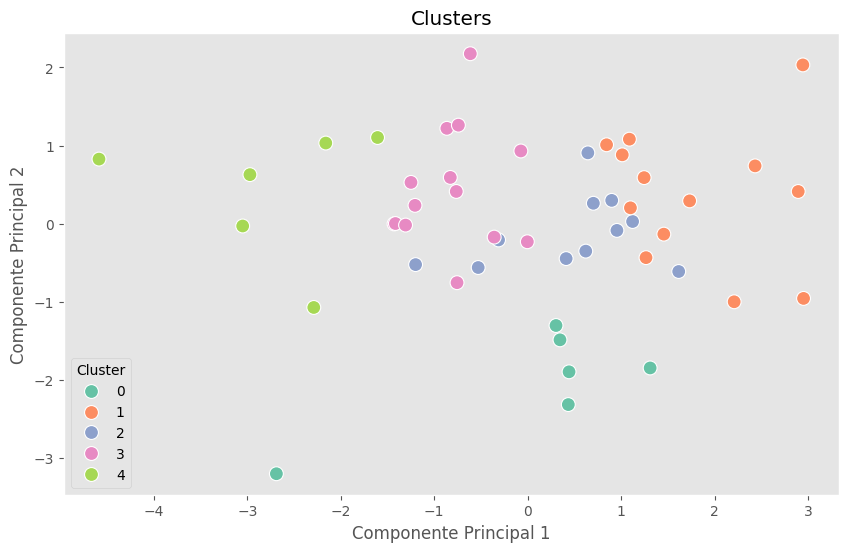

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="cluster", data=df_prod_pca, palette="Set2", s=100
)
plt.title("Clusters")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

In [ ]:
c_products_summary = df_prod_agg.groupby('cluster').agg({
    'ratio promo':'median',
    'ratio season':'median',
    'Units Sold':'median',
    'Sales':'median',
    'diff_days':'mean',
    'ID Product':'count'
})
# c_products_summary.to_csv('products_summary.csv')

c_products_summary.head(6)

,ratio promo,ratio season,Units Sold,Sales,diff_days,ID Product
cluster,,,,,,
0,1.247048,0.833124,10225.5,2541716.785,3.648816,6
1,1.120487,1.119537,10985.0,2777344.850,3.421848,13
2,0.913524,0.862887,10416.0,2593565.320,3.529671,11
3,1.010202,1.114860,9810.0,2507818.895,3.735452,14
4,0.839203,1.095812,9153.5,2241224.755,3.977518,6
